In [2]:
from PIL import Image
import csv

# Load the temperature color map image
image = Image.open("../../Data/Images/original/2020_LST.bmp")

In [7]:
# Create a CSV file to store the temperature data
csv_file = open("temperature_data.csv", "w", newline="")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["X", "Y", "r", "g", "b"])

11

In [8]:
# Iterate over each pixel in the image and extract temperature data
pixels = image.load()
width, height = image.size
for x in range(width):
    for y in range(height):
        r, g, b = pixels[x, y]
        if r == 0 and g == 0 and b == 0:
            temperature = -1
            csv_writer.writerow([x, y, -1, -1, -1])
        else:
            # Save the temperature data along with the pixel position to the CSV file
            csv_writer.writerow([x, y, r, g, 0])


# Close the CSV file
csv_file.close()

In [18]:
import pandas as pd
import colorsys
df = pd.read_csv('temperature_data.csv')
rgb_df = df.iloc[:, 2:5]
rgb_df = rgb_df.drop_duplicates()
rgb_df = rgb_df.reset_index(drop=True)

rgb_df.head()


,r,g,b
0,-1,-1,-1
1,77,179,0
2,90,186,0
3,63,171,0
4,103,194,0


In [19]:
hsv_df = rgb_df.apply(lambda row: colorsys.rgb_to_hsv(row['r'], row['g'], row['b']), axis=1)

hsv_df.head()

0                     (0.0, 0.0, -1)
1     (0.2616387337057728, 1.0, 179)
2    (0.25268817204301075, 1.0, 186)
3     (0.2719298245614035, 1.0, 171)
4     (0.2448453608247423, 1.0, 194)
dtype: object

In [20]:
# Add the HSV values to the DataFrame
rgb_df['H'] = hsv_df.apply(lambda x: x[0])
rgb_df['S'] = hsv_df.apply(lambda x: x[1])
rgb_df['V'] = hsv_df.apply(lambda x: x[2])

# Sort the DataFrame by hue (H) values
sorted_rgb_df = rgb_df.sort_values(by='H')

# Print the sorted RGB DataFrame
print(sorted_rgb_df)

      r    g  b         H    S    V
0    -1   -1 -1  0.000000  0.0   -1
25  255    0  0  0.000000  1.0  255
24  255   21  0  0.013725  1.0  255
23  255   38  0  0.024837  1.0  255
22  255   60  0  0.039216  1.0  255
21  255   81  0  0.052941  1.0  255
20  255  102  0  0.066667  1.0  255
19  255  119  0  0.077778  1.0  255
18  255  140  0  0.091503  1.0  255
17  255  162  0  0.105882  1.0  255
16  255  179  0  0.116993  1.0  255
15  255  200  0  0.130719  1.0  255
14  255  221  0  0.144444  1.0  255
13  255  242  0  0.158170  1.0  255
12  246  250  0  0.169333  1.0  250
11  226  242  0  0.177686  1.0  242
10  209  237  0  0.186357  1.0  237
8   187  230  0  0.197826  1.0  230
9   170  222  0  0.205706  1.0  222
6   154  214  0  0.213396  1.0  214
7   136  209  0  0.224880  1.0  209
5   121  201  0  0.233002  1.0  201
4   103  194  0  0.244845  1.0  194
2    90  186  0  0.252688  1.0  186
1    77  179  0  0.261639  1.0  179
3    63  171  0  0.271930  1.0  171
26   56  168  0  0.277778  1

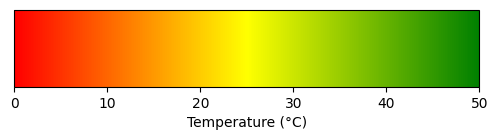

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Create a figure and axis for the legend
fig, ax = plt.subplots(figsize=(6, 1))

# Create a custom colormap with a gradient from red to yellow to green (without blue)
colors = ['red', 'yellow', 'green']
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors)

# Create a colorbar with the temperature range from 0 to 50 degrees
norm = plt.Normalize(0, 50)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
                  cax=ax, orientation='horizontal')

# Set the colorbar label
cb.set_label('Temperature (°C)')

# Show the plot
plt.show()


In [26]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# Create a custom colormap with a gradient from red to yellow to green (without blue)
colors = ['red', 'yellow', 'green']
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors)

# Generate the RGB values and corresponding temperatures
temperatures = np.arange(0, 51)
rgb_values = cmap(temperatures / 50.0)[:, :3] * 255  # Scale to RGB range (0-255)

# Create a DataFrame with the RGB and temperature values
data = {'R': rgb_values[:, 0], 'G': rgb_values[:, 1], 'B': rgb_values[:, 2], 'Temperature': temperatures}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('rgb_temperature_values.csv', index=False)
